This supplementary information presents :

- first, the code to generate the figures from the paper,
- second, some control experiments that were mentionned in the paper,
- finally, some perspectives for future work inspired by the algorithms presented in the paper.

# Figures for "An adaptive algorithm for unsupervised learning"



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)
seed = 42
np.random.seed(seed)

In [3]:
# some overhead for the formatting of figures
import matplotlib.pyplot as plt

fontsize = 12
FORMATS = ['.pdf', '.eps', '.png', '.tiff']
FORMATS = ['.pdf', '.png']
dpi_export = 600

fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
fig_width_pt = 450  # Get this from LaTeX using \showthe\columnwidth
#fig_width_pt = 1024 #221     # Get this from LaTeX using \showthe\columnwidth / x264 asks for a multiple of 2
ppi = 72.27 # (constant) definition of the ppi = points per inch
inches_per_pt = 1.0/ppi  # Convert pt to inches
#inches_per_cm = 1./2.54
fig_width = fig_width_pt*inches_per_pt  # width in inches
grid_fig_width = 2*fig_width
phi = (np.sqrt(5) + 1. ) /2
#legend.fontsize = 8
#fig_width = 9
fig_height = fig_width/phi
figsize = (fig_width, fig_height)


def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

import matplotlib
pylab_defaults = { 
    'font.size': 10,
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium',
    'text.usetex': False,
#    'font.family' : 'sans-serif',
#    'font.sans-serif' : ['Helvetica'],
    }
    
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update(pylab_defaults)
#matplotlib.rcParams.update({'text.usetex': True})

import matplotlib.cm as cm


from IPython.display import Image

DEBUG = True
DEBUG = False
hl, hs = 10*'-', 10*' '

In [4]:
tag = 'ICLR'
datapath = '../../SparseHebbianLearning/database'
# different runs
opts = dict(datapath=datapath, verbose=0)
#opts = dict(cache_dir='cache_dir_cluster', datapath=datapath, verbose=0)
#opts = dict(cache_dir='cache_dir_ICLR', datapath=datapath, verbose=0)

In [5]:
from shl_scripts.shl_experiments import SHL
shl = SHL(**opts)
data = shl.get_data(matname=tag)

In [6]:
shl?

Type:        SHL
String form: <shl_scripts.shl_experiments.SHL object at 0x110d406a0>
File:        ~/science/SparseHebbianLearning/shl_scripts/shl_experiments.py
Docstring:  
Base class to define SHL experiments:
    - initialization
    - coding and learning
    - visualization
    - quantitative analysis


In [7]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65520, 324)
average of patches =  -3.981519488962365e-05  +/-  0.007390208780988323
average energy of data =  0.2483654920811686 +/- 0.07671753653544079


In [8]:
#!ls -l {shl.cache_dir}/{tag}*
!ls {shl.cache_dir}/{tag}*lock*
!rm {shl.cache_dir}/{tag}*lock*
#!rm {shl.cache_dir}/{tag}*
#!ls -l {shl.cache_dir}/{tag}*

ls: cache_dir/ICLR*lock*: No such file or directory
rm: cache_dir/ICLR*lock*: No such file or directory


## figure 1:  Role of homeostasis in learning sparse representations

#### TODO : cross-validate with 10 different learnings

In [9]:
fname = 'figure_map'
N_cv = 10
one_cv = 0 # picking one to display intermediate results

### learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

----------          Non          ----------
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  7.123988737765042e-06 +/- 0.0011349341397207146
average energy of filters =  1.0 +/- 3.546477361781819e-17


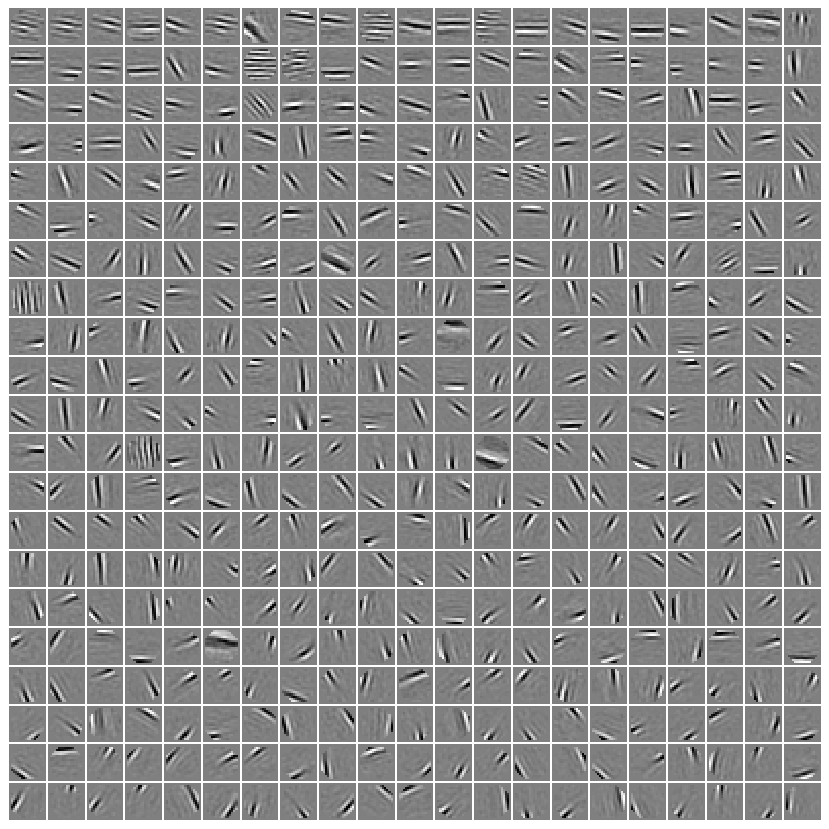

----------          OLS          ----------
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -3.1258426798939783e-07 +/- 0.0011127198695686763
average energy of filters =  1.0 +/- 3.8488312480383476e-17


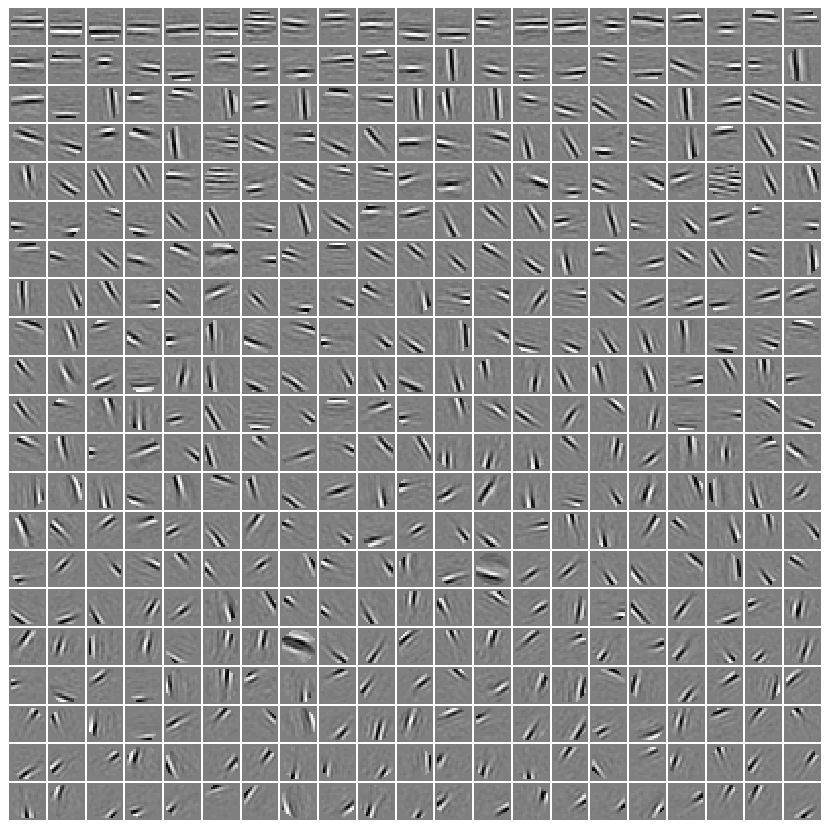

----------          HEH          ----------
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  2.9233139706507077e-06 +/- 0.0011063921818456044
average energy of filters =  1.0 +/- 4.06084993561207e-17


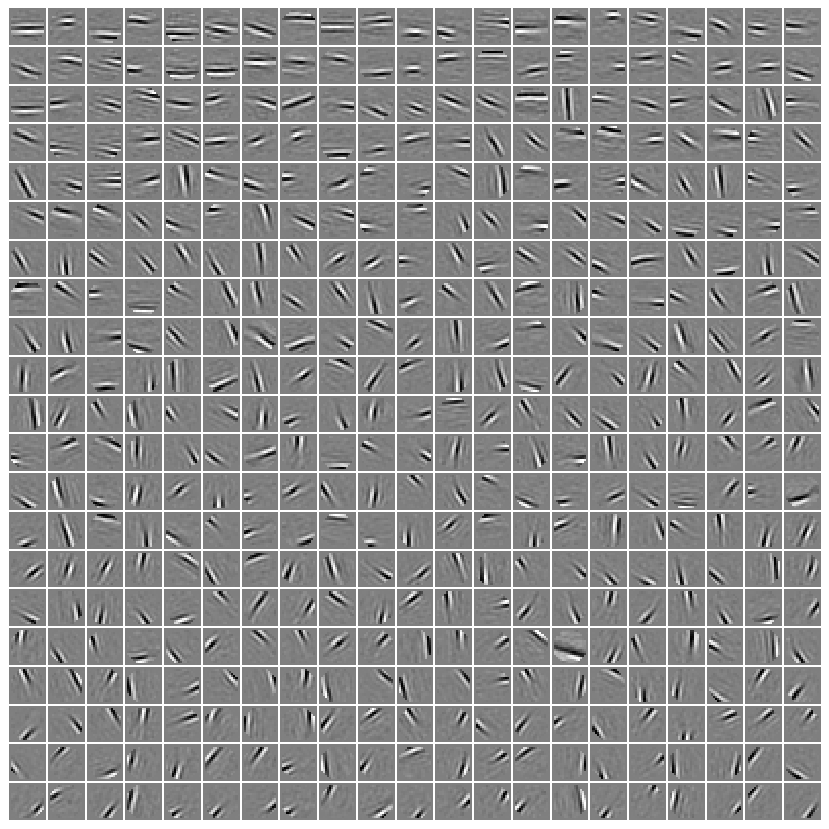

In [10]:
homeo_methods = ['None', 'OLS', 'HEH']

list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'time_plot_MC', 'show_Pcum']
list_figures = []
dico = {}
for i_cv in range(N_cv):
    dico[i_cv] = {}
    for homeo_method in homeo_methods:
        shl = SHL(homeo_method=homeo_method, seed=seed+i_cv, **opts)
        dico[i_cv][homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_seed=' + str(seed+i_cv))

list_figures = ['show_dico']
for i_cv in [one_cv]:
    for homeo_method in homeo_methods:
        print(hl + hs + homeo_method[:3] + hs + hl)
        shl = SHL(homeo_method=homeo_method, seed=seed+i_cv, **opts)
        shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_seed=' + str(seed+i_cv))

        print('size of dictionary = (number of filters, size of imagelets) = ', dico[i_cv][homeo_method].dictionary.shape)
        print('average of filters = ',  dico[i_cv][homeo_method].dictionary.mean(axis=1).mean(), 
              '+/-',  dico[i_cv][homeo_method].dictionary.mean(axis=1).std())
        SE = np.sqrt(np.sum(dico[i_cv][homeo_method].dictionary**2, axis=1))
        print('average energy of filters = ', SE.mean(), '+/-', SE.std())
        plt.show()


### panel A: plotting some dictionaries



In [11]:
pname = '/tmp/panel_A' #pname = fname + '_A'

In [12]:
from shl_scripts import show_dico
if DEBUG: show_dico(shl, dico[one_cvi_cv][homeo_method], data=data, dim_graph=(2,5))

In [13]:
dim_graph = (2, 9)
colors = ['black', 'orange', 'blue']
homeo_methods

['None', 'OLS', 'HEH']

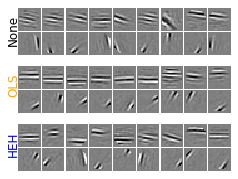

In [14]:
subplotpars = dict( left=0.042, right=1., bottom=0., top=1., wspace=0.05, hspace=0.05,)
fig, axs = plt.subplots(3, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)

for ax, color, homeo_method in zip(axs.ravel(), colors, homeo_methods): 
    ax.axis(c=color, lw=2, axisbg='w')
    ax.set_facecolor('w')
    fig, ax = show_dico(shl, dico[one_cv][homeo_method], data=data, dim_graph=dim_graph, fig=fig, ax=ax)
    # ax.set_ylabel(homeo_method)
    ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color=color, rotation=90)#, backgroundcolor='white'

for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)

In [15]:
### TODO put the p_min an p_max value in the filter map

In [16]:
if DEBUG: Image(pname +'.png')

In [17]:
if DEBUG: help(fig.subplots_adjust)

In [18]:
if DEBUG: help(plt.subplots)

In [ ]:
if DEBUG: help(matplotlib.gridspec.GridSpec)

### panel B: quantitative comparison



In [ ]:
pname = '/tmp/panel_B' #fname + '_B'

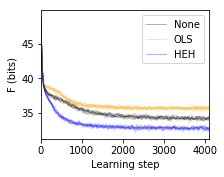

In [ ]:
from shl_scripts import time_plot
variable = 'F'
alpha_0, alpha = .3, .15
subplotpars = dict(left=0.2, right=.95, bottom=0.2, top=.95)#, wspace=0.05, hspace=0.05,)
fig, ax = plt.subplots(1, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)
for i_cv in range(N_cv):
    for color, homeo_method in zip(colors, homeo_methods): 
        ax.axis(c='b', lw=2, axisbg='w')
        ax.set_facecolor('w')
        if i_cv==0:
            fig, ax = time_plot(shl, dico[i_cv][homeo_method], variable=variable, unit='bits', color=color, label=homeo_method, alpha=alpha_0, fig=fig, ax=ax)
        else:
            fig, ax = time_plot(shl, dico[i_cv][homeo_method], variable=variable, unit='bits', color=color, alpha=alpha, fig=fig, ax=ax)        
        # ax.set_ylabel(homeo_method)
        #ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color='k', rotation=90)#, backgroundcolor='white'
ax.legend(loc='best')
for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)
if DEBUG: Image(pname +'.png')


### Montage of the subplots


In [ ]:
import tikzmagic

In [ ]:
%load_ext tikzmagic

In [ ]:
#DEBUG = True
if DEBUG: help(tikzmagic)

In [ ]:
%%tikz -f pdf --save {fname}.pdf
\draw[white, fill=white] (0.\linewidth,0) rectangle (1.\linewidth, .382\linewidth) ;
\draw [anchor=north west] (.0\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_A}};
\draw [anchor=north west] (.5\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_B}};
\begin{scope}[font=\bf\sffamily\large]
\draw [anchor=west,fill=white] (.0\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{A}$};
\draw [anchor=west,fill=white] (.53\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{B}$};
\end{scope}

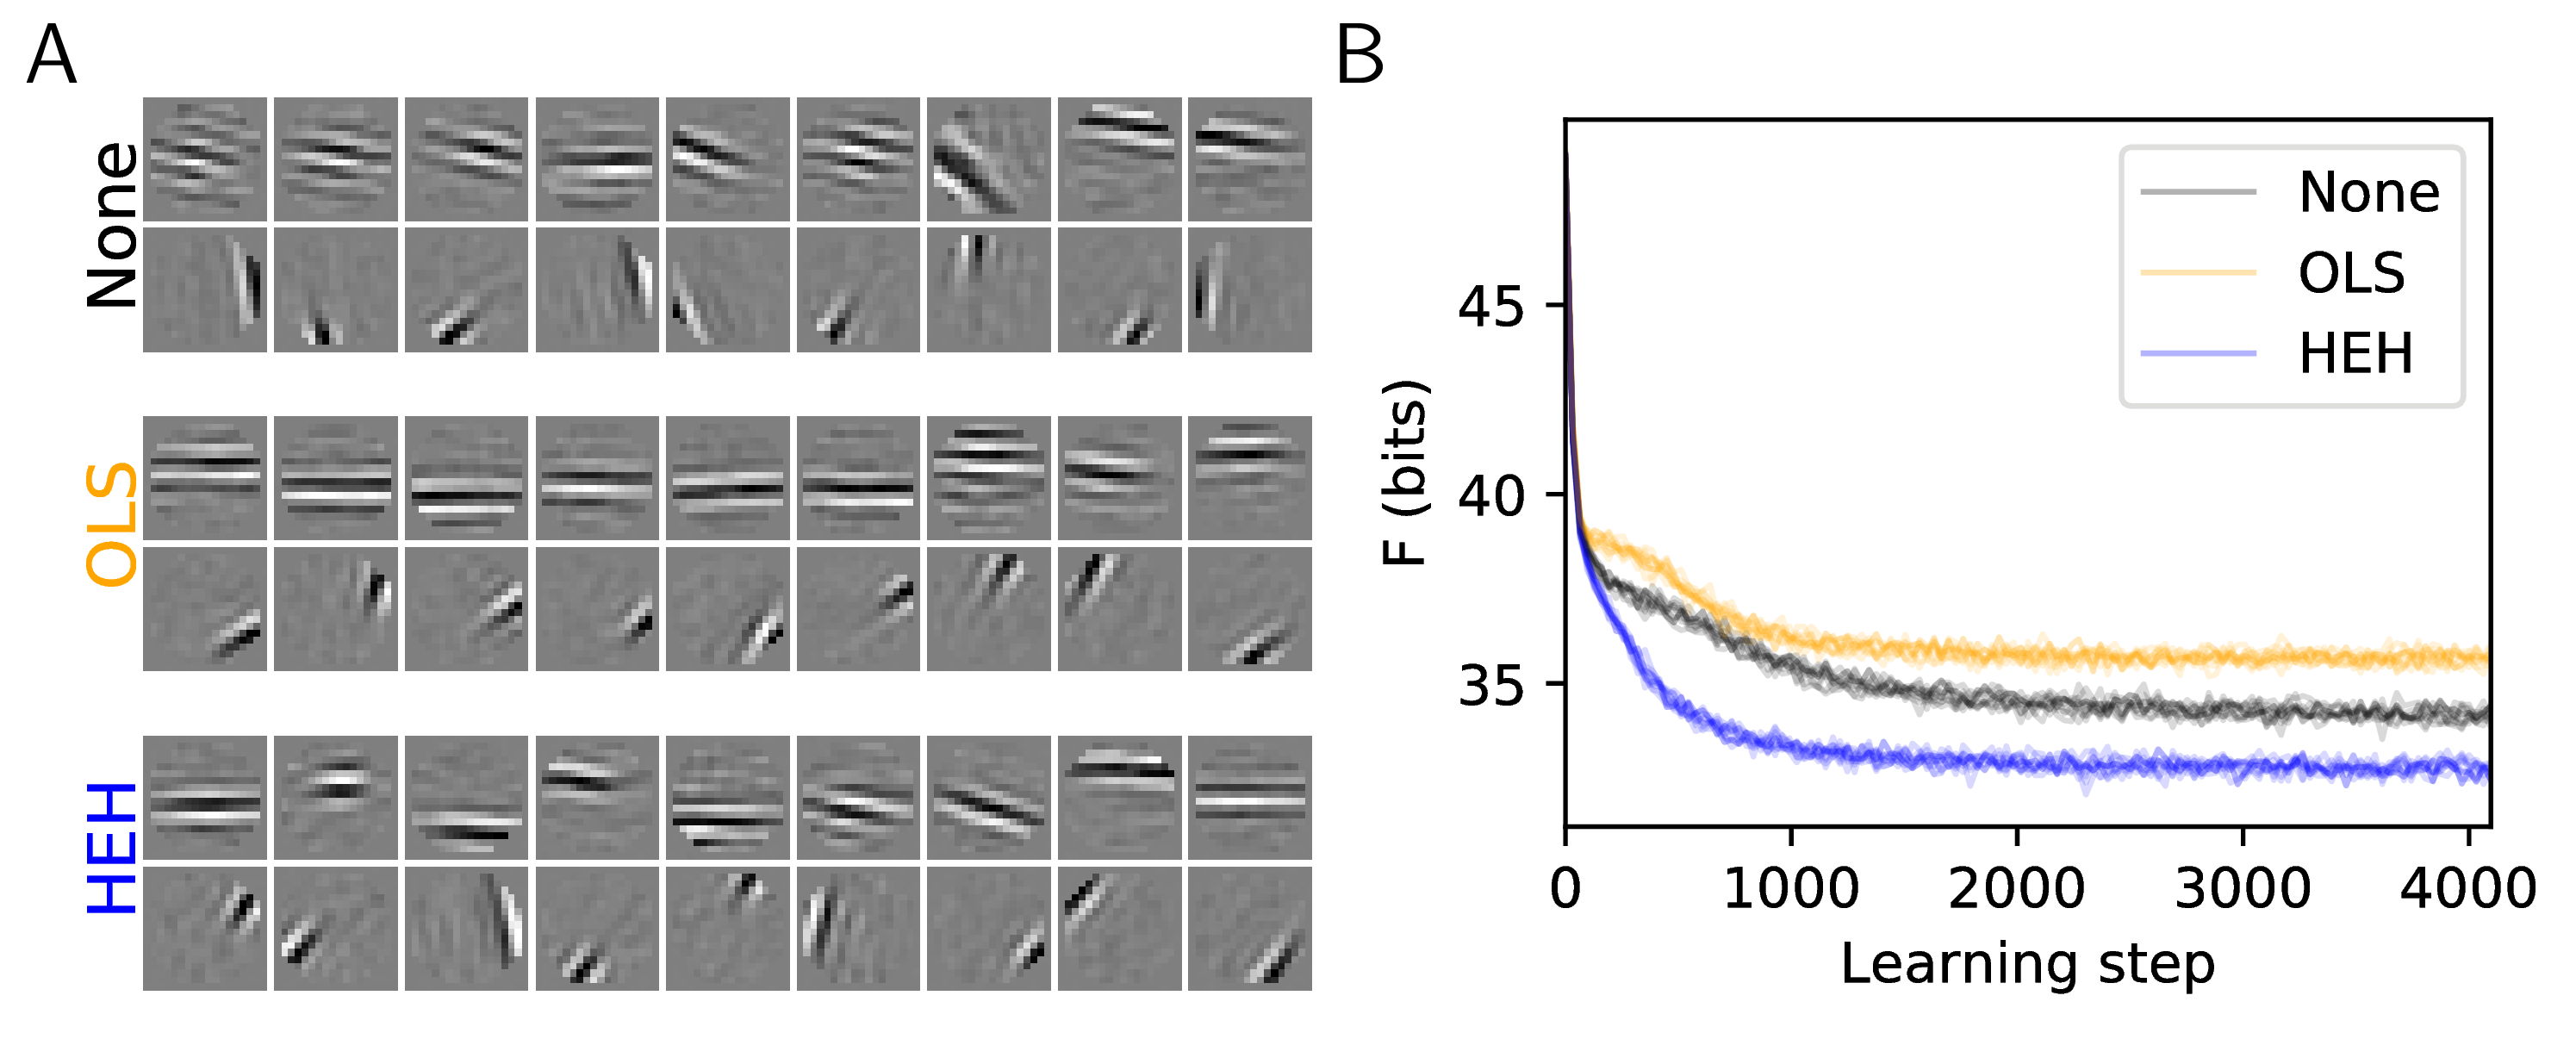

In [ ]:
!convert  -density {dpi_export} {fname}.pdf {fname}.jpg
!convert  -density {dpi_export} {fname}.pdf {fname}.png
#!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff
Image(fname +'.png')

## figure 2: Histogram Equalization Homeostasis



In [ ]:
fname = 'figure_HEH'

First collecting data:

----------          None          ----------


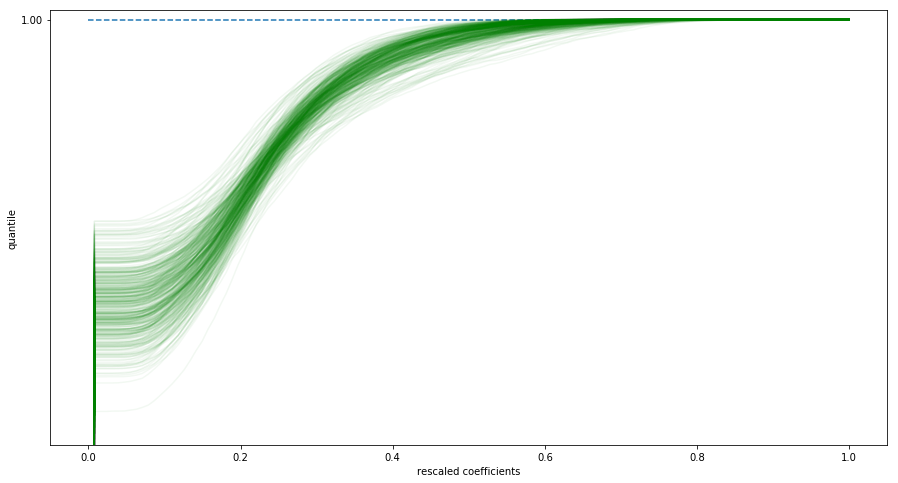

----------          OLS          ----------


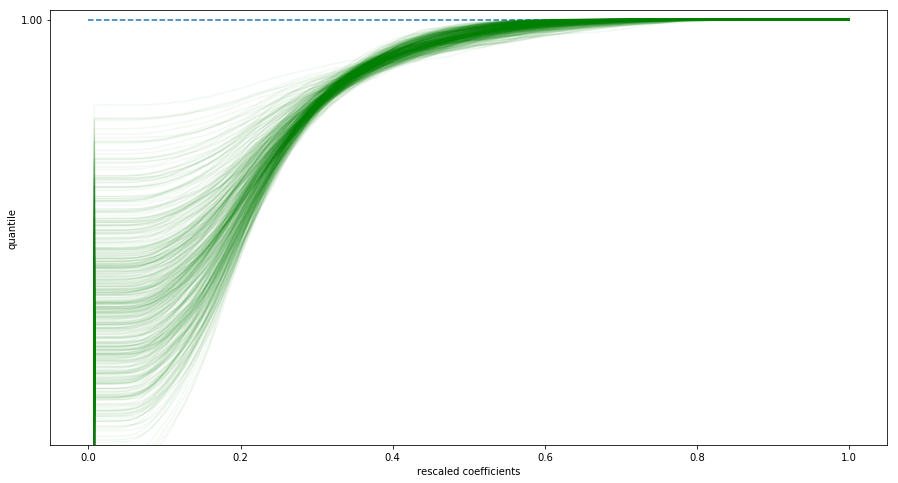

----------          HEH          ----------


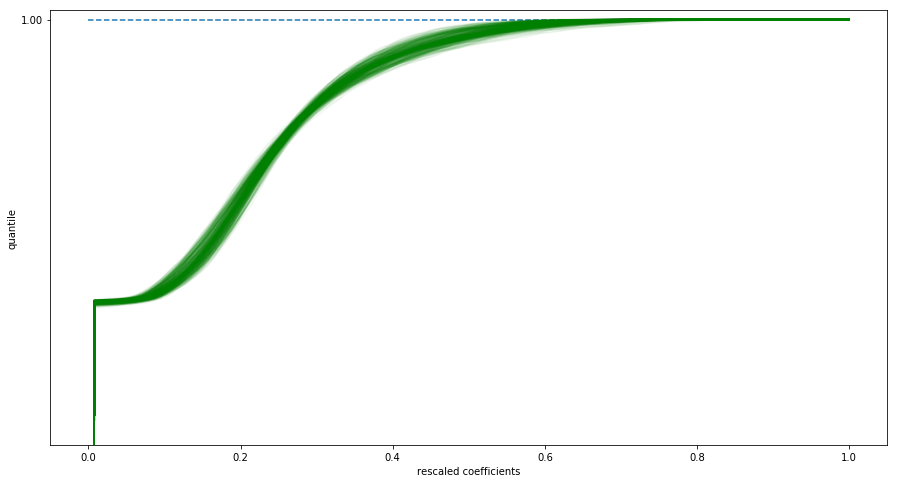

In [ ]:
list_figures = ['show_Pcum']

dico = {}
for homeo_method in homeo_methods:
    print(hl + hs + homeo_method + hs + hl)
    shl = SHL(homeo_method=homeo_method, **opts)
    #dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_' + str(one_cv))
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_seed=' + str(seed+one_cv))
    plt.show()

In [ ]:
dico[homeo_method].P_cum.shape

(441, 128)

### panel A: different P_cum



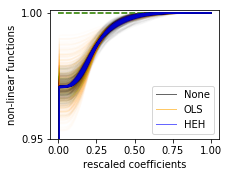

In [ ]:
pname = '/tmp/panel_A' #pname = fname + '_A'

from shl_scripts import plot_P_cum
variable = 'F'
subplotpars = dict(left=0.2, right=.95, bottom=0.2, top=.95)#, wspace=0.05, hspace=0.05,)
fig, ax = plt.subplots(1, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)
for color, homeo_method in zip(colors, homeo_methods): 
    ax.axis(c='b', lw=2, axisbg='w')
    ax.set_facecolor('w')
    fig, ax = plot_P_cum(dico[homeo_method].P_cum, ymin=0.95, ymax=1.001, 
                         title=None, suptitle=None, ylabel='non-linear functions', 
                         verbose=False, n_yticks=21, alpha=.02, c=color, fig=fig, ax=ax)
    ax.plot([0], [0], lw=1, color=color, label=homeo_method, alpha=.6)
    # ax.set_ylabel(homeo_method)
    #ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color='k', rotation=90)#, backgroundcolor='white'
ax.legend(loc='lower right')
for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)
if DEBUG: Image(pname +'.png')

In [ ]:
if DEBUG: help(fig.legend)

### panel B: comparing the effects of parameters



In [ ]:
pname = '/tmp/panel_B' #fname + '_B'


from shl_scripts.shl_experiments import SHL_set

homeo_methods = ['None', 'EMP', 'HAP', 'HEH', 'OLS']

homeo_methods = ['None', 'OLS', 'HEH']

variables = ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness', 'n_dictionary']
variables = ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness']
variables = ['alpha_homeo', 'eta_homeo']
variables = ['eta', 'alpha_homeo', 'eta_homeo']
variables = ['eta', 'eta_homeo']

list_figures = []

bases = [10, 10, 2, 2]
bases = [4, 4, 4, 4]

for homeo_method, base in zip(homeo_methods, bases):
    opts_ = opts.copy()
    opts_.update(homeo_method=homeo_method)
    experiments = SHL_set(opts_, tag=tag + '_' + homeo_method, base=base)
    experiments.run(variables=variables, n_jobs=1, verbose=0)
    

import matplotlib.pyplot as plt
subplotpars = dict(left=0.2, right=.95, bottom=0.2, top=.95, wspace=0.5, hspace=0.35,)

x, y = .05, -.3

if len(variables)==4:
    fig, axs = plt.subplots(2, 2, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars, sharey=True)
    for i_ax, variable in enumerate(variables):
        for color, homeo_method in zip(colors, homeo_methods): 
            opts_ = opts.copy()
            opts_.update(homeo_method=homeo_method)
            experiments = SHL_set(opts_, tag=tag + '_' + homeo_method)
            ax = axs[i_ax%2][i_ax//2]
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', fig=fig, ax=ax, color=color, display_variable='F', verbose=0) #, label=homeo_metho
            ax.set_xlabel('') #variable
            ax.text(x, y,  variable, transform=axs[i_ax].transAxes) 
            #axs[i_ax].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

else:    
    fig, axs = plt.subplots(len(variables), 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars, sharey=True)

    for i_ax, variable in enumerate(variables):
        for color, homeo_method in zip(colors, homeo_methods): 
            opts_ = opts.copy()
            opts_.update(homeo_method=homeo_method)
            experiments = SHL_set(opts_, tag=tag + '_' + homeo_method)
            fig, axs[i_ax] = experiments.scan(variable=variable, list_figures=[], display='final', fig=fig, ax=axs[i_ax], color=color, display_variable='F', verbose=0) #, label=homeo_metho
            axs[i_ax].set_xlabel('') #variable
            axs[i_ax].text(x, y,  variable, transform=axs[i_ax].transAxes) 
            #axs[i_ax].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#fig.legend(loc='lower right')
for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)
if DEBUG: Image(pname +'.png')


### Montage of the subplots


In [ ]:
%%tikz -f pdf --save {fname}.pdf
\draw[white, fill=white] (0.\linewidth,0) rectangle (1.\linewidth, .382\linewidth) ;
\draw [anchor=north west] (.0\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_A.pdf}};
\draw [anchor=north west] (.5\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_B.pdf}};
\begin{scope}[font=\bf\sffamily\large]
\draw [anchor=west,fill=white] (.0\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{A}$};
\draw [anchor=west,fill=white] (.53\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{B}$};
\end{scope}

In [ ]:
!convert  -density {dpi_export} {fname}.pdf {fname}.jpg
!convert  -density {dpi_export} {fname}.pdf {fname}.png
#!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff
Image(fname +'.png')

## figure 3:  


### learning




In [ ]:
fname = 'figure_HAP'

In [ ]:
colors = ['orange', 'red', 'green', 'blue']
homeo_methods = ['OLS', 'HEH', 'EMP', 'HAP']
list_figures = []
dico = {}
for i_cv in range(N_cv):
    dico[i_cv] = {}
    for homeo_method in homeo_methods:
        shl = SHL(homeo_method=homeo_method, seed=seed+i_cv, **opts)
        dico[i_cv][homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_seed=' + str(seed+i_cv))

list_figures = ['show_dico'] if DEBUG else []
for i_cv in [one_cv]:
    for homeo_method in homeo_methods:
        print(hl + hs + homeo_method + hs + hl)
        shl = SHL(homeo_method=homeo_method, seed=seed+i_cv, **opts)
        shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_seed=' + str(seed+i_cv))
        plt.show()
        print('size of dictionary = (number of filters, size of imagelets) = ', dico[i_cv][homeo_method].dictionary.shape)
        print('average of filters = ',  dico[i_cv][homeo_method].dictionary.mean(axis=1).mean(), 
              '+/-',  dico[i_cv][homeo_method].dictionary.mean(axis=1).std())
        SE = np.sqrt(np.sum(dico[i_cv][homeo_method].dictionary**2, axis=1))
        print('average energy of filters = ', SE.mean(), '+/-', SE.std())

### panel A: plotting some dictionaries



In [ ]:
pname = '/tmp/panel_A' #pname = fname + '_A'

In [ ]:

subplotpars = dict( left=0.042, right=1., bottom=0., top=1., wspace=0.05, hspace=0.05,)
fig, axs = plt.subplots(3, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)

for ax, color, homeo_method in zip(axs.ravel(), colors[1:], homeo_methods[1:]): 
    ax.axis(c=color, lw=2, axisbg='w')
    ax.set_facecolor('w')
    from shl_scripts import show_dico
    fig, ax = show_dico(shl, dico[one_cv][homeo_method], data=data, dim_graph=dim_graph, fig=fig, ax=ax)
    # ax.set_ylabel(homeo_method)
    ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color=color, rotation=90)#, backgroundcolor='white'

for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)

### panel B: quantitative comparison



In [ ]:
pname = '/tmp/panel_B' #fname + '_B'

In [ ]:
from shl_scripts import time_plot
variable = 'F'
alpha = .3
subplotpars = dict(left=0.2, right=.95, bottom=0.2, top=.95)#, wspace=0.05, hspace=0.05,)
fig, ax = plt.subplots(1, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)
for i_cv in range(N_cv):
    for color, homeo_method in zip(colors, homeo_methods): 
        ax.axis(c='b', lw=2, axisbg='w')
        ax.set_facecolor('w')
        if i_cv==0:
            fig, ax = time_plot(shl, dico[i_cv][homeo_method], variable=variable, unit='bits', color=color, label=homeo_method, alpha=alpha_0, fig=fig, ax=ax)
        else:
            fig, ax = time_plot(shl, dico[i_cv][homeo_method], variable=variable, unit='bits', color=color, alpha=alpha, fig=fig, ax=ax)        
ax.legend(loc='best')
for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)
if DEBUG: Image(pname +'.png')    

In [ ]:
if DEBUG: Image(pname +'.png')


### Montage of the subplots


In [ ]:
%%tikz -f pdf --save {fname}.pdf
\draw[white, fill=white] (0.\linewidth,0) rectangle (1.\linewidth, .382\linewidth) ;
\draw [anchor=north west] (.0\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_A}};
\draw [anchor=north west] (.5\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_B}};
\begin{scope}[font=\bf\sffamily\large]
\draw [anchor=west,fill=white] (.0\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{A}$};
\draw [anchor=west,fill=white] (.53\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{B}$};
\end{scope}

In [ ]:
!convert  -density {dpi_export} {fname}.pdf {fname}.jpg
!convert  -density {dpi_export} {fname}.pdf {fname}.png
#!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff
Image(fname +'.png')

## figure 4: Convolutional Neural Network  




In [ ]:
fname = 'figure_CNN'

In [ ]:
from CHAMP.DataLoader import LoadData
from CHAMP.DataTools import LocalContrastNormalization, FilterInputData, GenerateMask
from CHAMP.Monitor import DisplayDico, DisplayConvergenceCHAMP, DisplayWhere

import os
datapath = os.path.join("/tmp", "database")
path = os.path.join(datapath, "Raw_DataBase")
TrSet, TeSet = LoadData('Face', path, decorrelate=False, resize=(65, 65))

# MP Parameters
nb_dico = 20
width = 9
dico_size = (width, width)
l0 = 20
seed = 42
# Learning Parameters
eta = .05
nb_epoch = 500

TrSet, TeSet = LoadData('Face', path, decorrelate=False, resize=(65, 65))
N_TrSet, _, _, _ = LocalContrastNormalization(TrSet)
Filtered_L_TrSet = FilterInputData(
    N_TrSet, sigma=0.25, style='Custom', start_R=15)

mask = GenerateMask(full_size=(nb_dico, 1, width, width), sigma=0.8, style='Gaussian')

from CHAMP.CHAMP_Layer import CHAMP_Layer

from CHAMP.DataTools import SaveNetwork, LoadNetwork
homeo_methods = ['None', 'HAP']

for homeo_method, eta_homeo  in zip(homeo_methods, [0., 0.0025]):
    ffname = 'cache_dir_CNN/CHAMP_low_' + homeo_method + '.pkl'
    try:
        L1_mask = LoadNetwork(loading_path=ffname)
    except:
        L1_mask = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                          dico_size=dico_size, mask=mask, verbose=1)
        dico_mask = L1_mask.TrainLayer(
            Filtered_L_TrSet, eta=eta, eta_homeo=eta_homeo, nb_epoch=nb_epoch, seed=seed)
        SaveNetwork(Network=L1_mask, saving_path=ffname)


### panel A: plotting some dictionaries



In [ ]:
pname = '/tmp/panel_A' #pname = fname + '_A'

In [ ]:
subplotpars = dict(left=0.042, right=1., bottom=0., top=1., wspace=0.05, hspace=0.05,)

for color, homeo_method in zip(['black', 'green'], homeo_methods): 
    #fig, axs = plt.subplots(1, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)
    ffname = 'cache_dir_CNN/CHAMP_low_' + homeo_method + '.pkl'
    L1_mask = LoadNetwork(loading_path=ffname)
    fig, ax = DisplayDico(L1_mask.dictionary)
    # ax.set_ylabel(homeo_method)
    #for ax in list(axs):
    #    ax.axis(c=color, lw=2, axisbg='w')
    #    ax.set_facecolor('w')
    ax[0].text(-4, 3, homeo_method, fontsize=8, color=color, rotation=90)#, backgroundcolor='white'
    plt.tight_layout( pad=0., w_pad=0., h_pad=.0)


    for ext in FORMATS: fig.savefig(pname + '_' + homeo_method + ext, dpi=dpi_export)


### panel B: quantitative comparison



In [ ]:
pname = '/tmp/panel_B' #fname + '_B'

In [ ]:
from shl_scripts import time_plot
variable = 'F'
alpha = .3
subplotpars = dict(left=0.2, right=.95, bottom=0.2, top=.95)#, wspace=0.05, hspace=0.05,)

for color, homeo_method in zip(['black', 'green'], homeo_methods): 
    #fig, axs = plt.subplots(1, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)
    ffname = 'cache_dir_CNN/CHAMP_low_' + homeo_method + '.pkl'
    L1_mask = LoadNetwork(loading_path=ffname)
    fig, ax = DisplayConvergenceCHAMP(L1_mask, to_display=['histo'], color=color)
    ax.axis(c=color, lw=2, axisbg='w')
    ax.set_facecolor('w')
    ax.set_ylabel('counts')
    ax.set_xlabel('feature #')
    ax.set_ylim(0, 560)
    #ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color=color, rotation=90)#, backgroundcolor='white'
    #ax[0].text(-8, 3, homeo_method, fontsize=12, color=color, rotation=90)#, backgroundcolor='white'
    
    for ext in FORMATS: fig.savefig(pname + '_' + homeo_method + ext, dpi=dpi_export)
    if DEBUG: Image(pname +'.png')    


### Montage of the subplots


In [ ]:
%ls -ltr /tmp/panel_*

In [ ]:
fname

In [ ]:
382+191

In [ ]:
%%tikz -f pdf --save {fname}.pdf
\draw[white, fill=white] (0.\linewidth,0) rectangle (1.\linewidth, .382\linewidth) ;
\draw [anchor=north west] (.0\linewidth, .375\linewidth) node {\includegraphics[width=.95\linewidth]{/tmp/panel_A_None}};
\draw [anchor=north west] (.0\linewidth, .300\linewidth) node {\includegraphics[width=.95\linewidth]{/tmp/panel_A_HAP}};
\draw [anchor=north west] (.0\linewidth, .191\linewidth) node {\includegraphics[width=.45\linewidth]{/tmp/panel_B_None}};
\draw [anchor=north west] (.5\linewidth, .191\linewidth) node {\includegraphics[width=.45\linewidth]{/tmp/panel_B_HAP}};
\begin{scope}[font=\bf\sffamily\large]
%\draw [anchor=west,fill=white] (.0\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{A}$};
\draw [anchor=west,fill=white] (.0\linewidth, .191\linewidth) node [above right=-3mm] {$\mathsf{A}$};
\draw [anchor=west,fill=white] (.53\linewidth, .191\linewidth) node [above right=-3mm] {$\mathsf{B}$};
\end{scope}

In [ ]:
!convert  -density {dpi_export} {fname}.pdf {fname}.jpg
!convert  -density {dpi_export} {fname}.pdf {fname}.png
#!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff
Image(fname +'.png')

## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

# Supplementary controls




## starting a learning

In [ ]:
shl = SHL(**opts)
list_figures = ['show_dico', 'show_Pcum', 'time_plot_F']
dico = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_vanilla')

In [ ]:
print('size of dictionary = (number of filters, size of imagelets) = ', dico.dictionary.shape)
print('average of filters = ',  dico.dictionary.mean(axis=1).mean(), 
      '+/-',  dico.dictionary.mean(axis=1).std())
SE = np.sqrt(np.sum(dico.dictionary**2, axis=1))
print('average energy of filters = ', SE.mean(), '+/-', SE.std())


## getting help

In [ ]:
help(shl)

In [ ]:
help(dico)


## loading a database

Loading patches, with or without mask:

In [ ]:
N_patches = 12
from shl_scripts.shl_tools import show_data
opts_ = opts.copy()
opts_.update(verbose=0)
for i, (do_mask, label) in enumerate(zip([False, True], ['Without mask', 'With mask'])):
    data_ = SHL(DEBUG_DOWNSCALE=1, N_patches=N_patches, n_image=1, do_mask=do_mask, seed=seed, **opts_).get_data()
    fig, axs = show_data(data_)
    axs[0].set_ylabel(label);
    plt.show()

## Testing different algorithms



In [ ]:
fig, ax = None, None

for homeo_method in ['None', 'HAP']:
    for algorithm in ['lasso_lars', 'lars', 'elastic', 'omp', 'mp']: # 'threshold', 'lasso_cd', 
        opts_ = opts.copy()
        opts_.update(homeo_method=homeo_method, learning_algorithm=algorithm, verbose=0)
        shl = SHL(**opts_)
        dico= shl.learn_dico(data=data, list_figures=[],
                       matname=tag + ' - algorithm={}'.format(algorithm) + ' - homeo_method={}'.format(homeo_method))
        fig, ax = shl.time_plot(dico, variable='F', fig=fig, ax=ax, label=algorithm +'_' + homeo_method)

    ax.legend()

## Testing two different dictionary initalization strategies

White Noise Initialization + Learning

In [ ]:
shl = SHL(one_over_F=False, **opts)
dico_w = shl.learn_dico(data=data, matname=tag + '_WHITE', list_figures=[])
shl = SHL(one_over_F=True, **opts)
dico_1oF = shl.learn_dico(data=data, matname=tag + '_OVF', list_figures=[])
fig_error, ax_error = None, None
fig_error, ax_error = shl.time_plot(dico_w, variable='F', fig=fig_error, ax=ax_error, color='blue', label='white noise')
fig_error, ax_error = shl.time_plot(dico_1oF, variable='F', fig=fig_error, ax=ax_error, color='red', label='one over f')
#ax_error.set_ylim((0, .65))
ax_error.legend(loc='best')

## Testing  two different learning rates strategies

We use by defaut the strategy of ADAM, see https://arxiv.org/pdf/1412.6980.pdf

In [ ]:
shl = SHL(beta1=0., **opts)
dico_fixed = shl.learn_dico(data=data, matname=tag + '_fixed', list_figures=[])
shl = SHL(**opts)
dico_default = shl.learn_dico(data=data, matname=tag + '_default', list_figures=[])
fig_error, ax_error = None, None
fig_error, ax_error = shl.time_plot(dico_fixed, variable='F', fig=fig_error, ax=ax_error, color='blue', label='fixed')
fig_error, ax_error = shl.time_plot(dico_default, variable='F', fig=fig_error, ax=ax_error, color='red', label='ADAM')
#ax_error.set_ylim((0, .65))
ax_error.legend(loc='best')

## Testing different number of neurons and sparsity

As suggested by AnonReviewer3, we have tested how the convergence was modified by changing the number of neurons. By comparing different numbers of neurons we could re-draw the same figures for the convergence of the algorithm as in our original figures. In addition, we have also checked that this result will hold on a range of sparsity levels. In particular, we found that in general, increasing the ``l0_sparseness`` parameter, the convergence took progressively longer.  Importantly, we could see that in both cases, this did not depend on the kind of homeostasis heuristic chosen, proving the generality of our results.

This is shown in the supplementary material that we have added to our revision ("Testing different number of neurons and sparsity") . This useful extension proves the originality of our work as highlighted in point 4, and the generality of these results compared to the parameters of the network.


In [ ]:

from shl_scripts.shl_experiments import SHL_set
homeo_methods = ['None', 'OLS', 'HEH']
homeo_methods = ['None', 'EMP', 'HAP', 'HEH', 'OLS']

variables = ['l0_sparseness', 'n_dictionary']
list_figures = []

#n_dictionary=21**2

for homeo_method in homeo_methods:
    opts_ = opts.copy()
    opts_.update(homeo_method=homeo_method, datapath=datapath)
    experiments = SHL_set(opts_, tag=tag + '_' + homeo_method)
    experiments.run(variables=variables, n_jobs=1, verbose=0)

fig, axs = plt.subplots(len(variables), 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars, sharey=True)

for i_ax, variable in enumerate(variables):
    for color, homeo_method in zip(colors, homeo_methods): 
        opts_ = opts.copy()
        opts_.update(homeo_method=homeo_method, datapath=datapath)
        experiments = SHL_set(opts_, tag=tag + '_' + homeo_method)
        fig, axs[i_ax] = experiments.scan(variable=variable, list_figures=[], display='final', fig=fig, ax=axs[i_ax], color=color, display_variable='F', verbose=0) #, label=homeo_metho
        axs[i_ax].set_xlabel('') #variable
        axs[i_ax].text(.1, .8,  variable, transform=axs[i_ax].transAxes) 
        #axs[i_ax].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


# Perspectives



## Convolutional neural networks



In [ ]:
from CHAMP.DataLoader import LoadData
from CHAMP.DataTools import LocalContrastNormalization, FilterInputData, GenerateMask
from CHAMP.Monitor import DisplayDico, DisplayConvergenceCHAMP, DisplayWhere

import os
home = os.getenv('HOME')
datapath = os.path.join("/tmp", "database")
path = os.path.join(datapath, "Face_DataBase")
TrSet, TeSet = LoadData('Face', path, decorrelate=False, resize=(65, 65))
to_display = TrSet[0][0, 0:10, :, :, :]
print('Size=', TrSet[0].shape)
DisplayDico(to_display)

### Training on a face database


In [ ]:
# MP Parameters
nb_dico = 20
width = 9
dico_size = (width, width)
l0 = 20
seed = 42
# Learning Parameters
eta = .05
nb_epoch = 500

TrSet, TeSet = LoadData('Face', path, decorrelate=False, resize=(65, 65))
N_TrSet, _, _, _ = LocalContrastNormalization(TrSet)
Filtered_L_TrSet = FilterInputData(
    N_TrSet, sigma=0.25, style='Custom', start_R=15)
to_display = Filtered_L_TrSet[0][0, 0:10, :, :, :]
DisplayDico(to_display)

mask = GenerateMask(full_size=(nb_dico, 1, width, width), sigma=0.8, style='Gaussian')
DisplayDico(mask)

### Training the ConvMP Layer with homeostasis


In [ ]:
from CHAMP.CHAMP_Layer import CHAMP_Layer

from CHAMP.DataTools import SaveNetwork, LoadNetwork
fname = 'cache_dir_CNN/CHAMP_low_None.pkl'
try:
    L1_mask = LoadNetwork(loading_path=fname)
except:
    L1_mask = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                      dico_size=dico_size, mask=mask, verbose=2)
    dico_mask = L1_mask.TrainLayer(
        Filtered_L_TrSet, eta=eta, nb_epoch=nb_epoch, seed=seed)
    SaveNetwork(Network=L1_mask, saving_path=fname)

DisplayDico(L1_mask.dictionary)
DisplayConvergenceCHAMP(L1_mask, to_display=['error', 'histo'])
DisplayWhere(L1_mask.where)


### Training the ConvMP Layer with homeostasis


In [ ]:
fname = 'cache_dir_CNN/CHAMP_low_HAP.pkl'
try:
    L1_mask = LoadNetwork(loading_path=fname)
except:

    # Learning Parameters
    eta_homeo = 0.0025
    L1_mask = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                          dico_size=dico_size, mask=mask, verbose=1)
    dico_mask = L1_mask.TrainLayer(
        Filtered_L_TrSet, eta=eta, eta_homeo=eta_homeo, nb_epoch=nb_epoch, seed=seed)
    SaveNetwork(Network=L1_mask, saving_path=fname)

DisplayDico(L1_mask.dictionary)
DisplayConvergenceCHAMP(L1_mask, to_display=['error', 'histo'])
DisplayWhere(L1_mask.where)

### Reconstructing the input image

In [ ]:
from CHAMP.DataTools import Rebuilt
import torch
rebuilt_image = Rebuilt(torch.FloatTensor(L1_mask.code), L1_mask.dictionary)
DisplayDico(rebuilt_image[0:10, :, :, :])

### Training the ConvMP Layer with higher-level filters

We train higher-level feature vectors by forcing the network to :

- learn bigger filters,
- represent the information using a bigger dictionary (higher sparseness)
- represent the information with less features (higher sparseness)



In [ ]:
fname = 'cache_dir_CNN/CHAMP_high_None.pkl'
try:
    L1_mask = LoadNetwork(loading_path=fname)
except:

    nb_dico = 60
    width = 19
    dico_size = (width, width)
    l0 = 5
    mask = GenerateMask(full_size=(nb_dico, 1, width, width), sigma=0.8, style='Gaussian')
    # Learning Parameters
    eta_homeo = 0.0
    eta = .05
    nb_epoch = 500
    # learn
    L1_mask = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                          dico_size=dico_size, mask=mask, verbose=0)
    dico_mask = L1_mask.TrainLayer(
        Filtered_L_TrSet, eta=eta, eta_homeo=eta_homeo, nb_epoch=nb_epoch, seed=seed)
    SaveNetwork(Network=L1_mask, saving_path=fname)


DisplayDico(L1_mask.dictionary)
DisplayConvergenceCHAMP(L1_mask, to_display=['error'])#, 'histo'])
DisplayWhere(L1_mask.where)

In [ ]:
fname = 'cache_dir_CNN/CHAMP_high_HAP.pkl'
try:
    L1_mask = LoadNetwork(loading_path=fname)
except:

    nb_dico = 60
    width = 19
    dico_size = (width, width)
    l0 = 5
    mask = GenerateMask(full_size=(nb_dico, 1, width, width), sigma=0.8, style='Gaussian')
    # Learning Parameters
    eta_homeo = 0.0025
    eta = .05
    nb_epoch = 500
    # learn
    L1_mask = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                          dico_size=dico_size, mask=mask, verbose=0)
    dico_mask = L1_mask.TrainLayer(
        Filtered_L_TrSet, eta=eta, eta_homeo=eta_homeo, nb_epoch=nb_epoch, seed=seed)
    SaveNetwork(Network=L1_mask, saving_path=fname)

DisplayDico(L1_mask.dictionary)
DisplayConvergenceCHAMP(L1_mask, to_display=['error'])#, 'histo'])
DisplayWhere(L1_mask.where)

### Training on MNIST database


# Computational details



## caching simulation data

A convenience script to run and cache most learning items in this notebooks:

In [ ]:
!ls -l {shl.cache_dir}/{tag}*
#!rm {shl.cache_dir}/{tag}*lock*
#!rm {shl.cache_dir}/{tag}*
#!ls -l {shl.cache_dir}/{tag}*

In [ ]:
%%writefile model.py
#!/usr/bin/env python3
# -*- coding: utf-8 -*
tag = 'ICLR'
from shl_scripts.shl_experiments import SHL, prun
# pre-loading data
datapath = '../../SparseHebbianLearning/database'
# different runs
#opts = dict(cache_dir='cache_dir_ICLR', datapath=datapath, verbose=0)
#opts = dict(cache_dir='cache_dir_cluster', datapath=datapath, verbose=0)
opts = dict(datapath=datapath, verbose=0)

shl = SHL(**opts)
data = shl.get_data(matname=tag)

# running main simulations
# Figure 1 & 3
N_cv = 10
homeo_methods = ['None', 'OLS', 'HEH', 'HAP', 'EMP']
seed = 42

# running in parallel on a multi-core machine
import sys
try:
    n_jobs = int(sys.argv[1])
    print('n_jobs=', n_jobs)
except:
    n_jobs = 4
    n_jobs = 9
    n_jobs = 10
    n_jobs = 1
    n_jobs = 35

    
if n_jobs>0:

    list_figures = []

    from shl_scripts.shl_experiments import SHL_set
    for homeo_method in homeo_methods:
        opts_ = opts.copy()
        opts_.update(homeo_method=homeo_method)
        experiments = SHL_set(opts_, tag=tag + '_' + homeo_method, N_scan=N_cv)
        experiments.run(variables=['seed'], n_jobs=n_jobs, verbose=0)

    # Figure 2-B
    variables = ['eta', 'alpha_homeo', 'eta_homeo']
    variables = ['eta', 'eta_homeo', 'l0_sparseness', 'n_dictionary']
    bases = [10, 10, 2, 2]

    for homeo_method, base in zip(homeo_methods, bases):
        opts_ = opts.copy()
        opts_.update(homeo_method=homeo_method)
        experiments = SHL_set(opts_, tag=tag + '_' + homeo_method, base=base)
        experiments.run(variables=variables, n_jobs=n_jobs, verbose=0)

    # Annex X.X

    shl = SHL(**opts)
    dico = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_vanilla')
    
    for algorithm in ['lasso_lars', 'lasso_cd', 'lars', 'elastic', 'omp', 'mp']: # 'threshold',
        opts_ = opts.copy()
        opts_.update(homeo_method='None', learning_algorithm=algorithm, verbose=0)
        shl = SHL(**opts_)
        dico= shl.learn_dico(data=data, list_figures=[],
                       matname=tag + ' - algorithm={}'.format(algorithm))

    for homeo_method in ['None', 'HAP']:
        for algorithm in ['lasso_lars', 'lars', 'elastic', 'omp', 'mp']: # 'threshold', 'lasso_cd', 
            opts_ = opts.copy()
            opts_.update(homeo_method=homeo_method, learning_algorithm=algorithm, verbose=0)
            shl = SHL(**opts_)
            dico= shl.learn_dico(data=data, list_figures=[],
                           matname=tag + ' - algorithm={}'.format(algorithm) + ' - homeo_method={}'.format(homeo_method))
    
    shl = SHL(one_over_F=False, **opts)
    dico_w = shl.learn_dico(data=data, matname=tag + '_WHITE', list_figures=[])
    shl = SHL(one_over_F=True, **opts)
    dico_1oF = shl.learn_dico(data=data, matname=tag + '_OVF', list_figures=[])

    shl = SHL(beta1=0., **opts)
    dico_fixed = shl.learn_dico(data=data, matname=tag + '_fixed', list_figures=[])
    shl = SHL(**opts)
    dico_default = shl.learn_dico(data=data, matname=tag + '_default', list_figures=[])


In [ ]:
%run model.py 0

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts

##  version control

In [ ]:
!git status

In [ ]:
!git pull

In [ ]:
!git commit -am' {tag} : re-running notebooks' 

In [ ]:
!git push

##  exporting the notebook

In [ ]:
!jupyter nbconvert Annex.ipynb

In [ ]:
#!jupyter-nbconvert --template report --to pdf Annex.ipynb

In [ ]:
!pandoc Annex.html -o Annex.pdf

In [ ]:
!zip Annex.zip Annex.html

Done. Thanks for your attention!